# Problem: Predict the income of the respondents of the census data.

In [1]:
header = [ 'age','class of worker','industry code','occupation code','education','wage per hour',
          'enrolled in edu inst last wk','marital status','major industry code',
 'major occupation code','race','hispanic Origin','sex','member of a labor union','reason for unemployment',
          'full or part time employment stat','capital gains',
 'capital losses','divdends from stocks','tax filer stat','region of prev residence','state of previous residence',
          'detailed household and family stat',
 'detailed household summary in household','migration code-change in msa','migration code-change in reg',
          'migration code-move within reg',
 'live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18',
 'total person earnings','country of birth father','country of birth mother','country of birth self','citizenship', 
          'own business or self employed',
          'fill inc questionnaire for veterans admin','veterans benefits','weeks worked in year','year','income']

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib
path = os.path.abspath('../')
print(path)
train = pd.read_csv(path + '/census-income.data.gz', names = header)
test = pd.read_csv(path + '/census-income.test.gz', names = header)

D:\


In [5]:
train.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [6]:
test.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [7]:
train.shape

(199523, 42)

In [8]:
test.shape

(99762, 42)

In [9]:
train.dtypes

age                                            int64
class of worker                               object
industry code                                  int64
occupation code                                int64
education                                     object
wage per hour                                  int64
enrolled in edu inst last wk                  object
marital status                                object
major industry code                           object
major occupation code                         object
race                                          object
hispanic Origin                               object
sex                                           object
member of a labor union                       object
reason for unemployment                       object
full or part time employment stat             object
capital gains                                  int64
capital losses                                 int64
divdends from stocks                          

In [10]:
test.dtypes

age                                            int64
class of worker                               object
industry code                                  int64
occupation code                                int64
education                                     object
wage per hour                                  int64
enrolled in edu inst last wk                  object
marital status                                object
major industry code                           object
major occupation code                         object
race                                          object
hispanic Origin                               object
sex                                           object
member of a labor union                       object
reason for unemployment                       object
full or part time employment stat             object
capital gains                                  int64
capital losses                                 int64
divdends from stocks                          

In [11]:
train.dtypes.value_counts()

object     29
int64      12
float64     1
dtype: int64

In [12]:
test.dtypes.value_counts()

object     29
int64      12
float64     1
dtype: int64

In [13]:
train.select_dtypes(include = ['int64','float64'])

,age,industry code,occupation code,wage per hour,capital gains,capital losses,divdends from stocks,migration code-change in msa,family members under 18,own business or self employed,veterans benefits,weeks worked in year,year
0,73,0,0,0,0,0,0,1700.09,0,0,2,0,95
1,58,4,34,0,0,0,0,1053.55,1,0,2,52,94
2,18,0,0,0,0,0,0,991.95,0,0,2,0,95
3,9,0,0,0,0,0,0,1758.14,0,0,0,0,94
4,10,0,0,0,0,0,0,1069.16,0,0,0,0,94
5,48,40,10,1200,0,0,0,162.61,1,2,2,52,95
6,42,34,3,0,5178,0,0,1535.86,6,0,2,52,94
7,28,4,40,0,0,0,0,898.83,4,0,2,30,95
8,47,43,26,876,0,0,0,1661.53,5,0,2,52,95
9,34,4,37,0,0,0,0,1146.79,6,0,2,52,94


In [14]:
test.select_dtypes(include = ['int64','float64'])

,age,industry code,occupation code,wage per hour,capital gains,capital losses,divdends from stocks,migration code-change in msa,family members under 18,own business or self employed,veterans benefits,weeks worked in year,year
0,38,6,36,0,0,0,0,1032.38,4,0,2,12,95
1,44,37,12,0,0,0,2500,1462.33,1,0,2,26,95
2,2,0,0,0,0,0,0,1601.75,0,0,0,0,95
3,35,29,3,0,0,0,0,1866.88,5,2,2,52,94
4,49,4,34,0,0,0,0,1394.54,4,0,2,50,95
5,13,0,0,0,0,0,0,2556.34,0,0,0,0,94
6,1,0,0,0,0,0,0,1723.61,0,0,0,0,94
7,61,0,0,0,0,0,0,1083.03,0,0,2,0,95
8,38,45,12,0,0,0,0,1767.95,1,0,2,52,94
9,7,0,0,0,0,0,0,1595.19,0,0,0,0,94


In [15]:
train.select_dtypes(include = ['object'])

,class of worker,education,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,...,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,total person earnings,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin,income
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,- 50000.
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,?,Not in universe under 1 year old,?,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.


In [16]:
test.select_dtypes(include = ['object'])

,class of worker,education,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,...,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,total person earnings,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin,income
0,Private,1st 2nd 3rd or 4th grade,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,Not in universe,- 50000.
1,Self-employed-not incorporated,Associates degree-occup /vocational,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
2,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,...,?,Not in universe under 1 year old,?,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
3,Private,High school graduate,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
4,Private,High school graduate,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
5,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,Germany,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
6,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,Mexico,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
7,Not in universe,High school graduate,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
8,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,Black,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
9,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.


In [17]:
train1 = train['live in this house 1 year ago' ][0]

In [18]:
train1

' ?'

In [19]:
train = train.replace(' ?',np.NaN)

In [20]:
traincopy = train
traincopy = traincopy.dropna(axis = 'rows')

In [21]:
traincopy.shape

(95130, 42)

In [22]:
train.shape

(199523, 42)

In [23]:
test.shape

(99762, 42)

In [24]:
train.select_dtypes(include = ['object'])

,class of worker,education,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,...,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,total person earnings,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin,income
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,- 50000.
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,NaN,Not in universe under 1 year old,NaN,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.


In [25]:
test = test.replace(' ?',np.NaN)

In [26]:
test.select_dtypes(include = ['object'])

,class of worker,education,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,...,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,total person earnings,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin,income
0,Private,1st 2nd 3rd or 4th grade,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,Not in universe,- 50000.
1,Self-employed-not incorporated,Associates degree-occup /vocational,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
2,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
3,Private,High school graduate,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
4,Private,High school graduate,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
5,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,Germany,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
6,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,Mexico,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
7,Not in universe,High school graduate,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
8,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,Black,All other,Male,Not in universe,...,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
9,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.


In [27]:
xtrain = train.copy()

In [28]:
xtrain = xtrain.drop(columns = ['wage per hour','enrolled in edu inst last wk','major industry code','major occupation code','reason for unemployment','detailed household and family stat','detailed household summary in household','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','fill inc questionnaire for veterans admin','veterans benefits'])

In [29]:
ytrain = train['income']

In [30]:
train.apply(lambda x: x.isnull().sum())

age                                              0
class of worker                                  0
industry code                                    0
occupation code                                  0
education                                        0
wage per hour                                    0
enrolled in edu inst last wk                     0
marital status                                   0
major industry code                              0
major occupation code                            0
race                                             0
hispanic Origin                                  0
sex                                              0
member of a labor union                          0
reason for unemployment                          0
full or part time employment stat                0
capital gains                                    0
capital losses                                   0
divdends from stocks                             0
tax filer stat                 

In [31]:
xtrain.apply(lambda x: x.isnull().sum())

age                                     0
class of worker                         0
industry code                           0
occupation code                         0
education                               0
marital status                          0
race                                    0
hispanic Origin                         0
sex                                     0
member of a labor union                 0
full or part time employment stat       0
capital gains                           0
capital losses                          0
divdends from stocks                    0
tax filer stat                          0
region of prev residence                0
state of previous residence           708
total person earnings                   0
country of birth self                3393
citizenship                             0
own business or self employed           0
weeks worked in year                    0
year                                    0
income                            

In [32]:
ytrain.isnull().sum()

0

In [33]:
xtrain = xtrain.drop(columns = ['state of previous residence','country of birth self']) #as these columns look unwanted

In [34]:
xtest = test.copy()
xtest = xtest.drop(columns = ['wage per hour','enrolled in edu inst last wk','major industry code','income','major occupation code','reason for unemployment','detailed household and family stat','detailed household summary in household','migration code-change in msa','migration code-change in reg','migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt','num persons worked for employer','family members under 18','country of birth father','country of birth mother','fill inc questionnaire for veterans admin','veterans benefits'])

In [35]:
ytest = test['income']

In [36]:
test.apply(lambda x: x.isnull().sum())

age                                              0
class of worker                                  0
industry code                                    0
occupation code                                  0
education                                        0
wage per hour                                    0
enrolled in edu inst last wk                     0
marital status                                   0
major industry code                              0
major occupation code                            0
race                                             0
hispanic Origin                                  0
sex                                              0
member of a labor union                          0
reason for unemployment                          0
full or part time employment stat                0
capital gains                                    0
capital losses                                   0
divdends from stocks                             0
tax filer stat                 

In [37]:
xtest.apply(lambda x: x.isnull().sum())

age                                     0
class of worker                         0
industry code                           0
occupation code                         0
education                               0
marital status                          0
race                                    0
hispanic Origin                         0
sex                                     0
member of a labor union                 0
full or part time employment stat       0
capital gains                           0
capital losses                          0
divdends from stocks                    0
tax filer stat                          0
region of prev residence                0
state of previous residence           330
total person earnings                   0
country of birth self                1764
citizenship                             0
own business or self employed           0
weeks worked in year                    0
year                                    0
dtype: int64

In [38]:
ytest.isnull().sum()

0

In [39]:
xtest = xtest.drop(columns = ['state of previous residence','country of birth self']) #as these columns look unwanted

In [40]:
xtest.apply(lambda x: x.isnull().sum())

age                                  0
class of worker                      0
industry code                        0
occupation code                      0
education                            0
marital status                       0
race                                 0
hispanic Origin                      0
sex                                  0
member of a labor union              0
full or part time employment stat    0
capital gains                        0
capital losses                       0
divdends from stocks                 0
tax filer stat                       0
region of prev residence             0
total person earnings                0
citizenship                          0
own business or self employed        0
weeks worked in year                 0
year                                 0
dtype: int64

# Univariate & Multivariate Analysis of training data

In [41]:
categorical_var = xtrain.dtypes.loc[xtrain.dtypes=='object'].index
print(categorical_var) 

Index(['class of worker', 'education', 'marital status', 'race',
       'hispanic Origin', 'sex', 'member of a labor union',
       'full or part time employment stat', 'tax filer stat',
       'region of prev residence', 'total person earnings', 'citizenship',
       'income'],
      dtype='object')


In [42]:
xtrain[categorical_var].apply(lambda x:len(x.unique()))

class of worker                       9
education                            17
marital status                        7
race                                  5
hispanic Origin                      10
sex                                   2
member of a labor union               3
full or part time employment stat     8
tax filer stat                        6
region of prev residence              6
total person earnings                 5
citizenship                           5
income                                2
dtype: int64

In [43]:
floatvar = xtrain.dtypes.loc[xtrain.dtypes == 'float64'].index
print(floatvar)

Index([], dtype='object')


In [44]:
intvar = xtrain.dtypes.loc[xtrain.dtypes == 'int64'].index
print(intvar)

Index(['age', 'industry code', 'occupation code', 'capital gains',
       'capital losses', 'divdends from stocks',
       'own business or self employed', 'weeks worked in year', 'year'],
      dtype='object')


In [45]:
xtrain[intvar].apply(lambda x : len(x.unique()))

age                                91
industry code                      52
occupation code                    47
capital gains                     132
capital losses                    113
divdends from stocks             1478
own business or self employed       3
weeks worked in year               53
year                                2
dtype: int64

In [46]:
xtrain['sex'].value_counts()

 Female    103984
 Male       95539
Name: sex, dtype: int64

In [47]:
xtrain['age'].value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
2     3236
7     3218
30    3203
32    3188
8     3187
6     3171
9     3162
13    3152
39    3144
1     3138
41    3134
10    3134
11    3128
40    3114
14    3068
12    3060
29    3050
28    3013
42    2995
15    2926
      ... 
60    1560
65    1550
62    1531
63    1501
61    1497
67    1496
66    1443
68    1436
71    1418
69    1412
70    1410
73    1354
72    1315
74    1227
75    1065
76    1050
77     979
78     876
79     811
80     799
90     725
81     720
82     615
83     561
84     519
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64

In [48]:
xtrain['education'].value_counts()

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

In [49]:
xtrain['industry code'].value_counts()

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: industry code, dtype: int64

In [50]:
xtrain['class of worker'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64

In [51]:
xtrain['race'].value_counts()

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

In [52]:
xtrain['total person earnings'].value_counts()

 Not in universe           144232
 Both parents present       38983
 Mother only present        12772
 Father only present         1883
 Neither parent present      1653
Name: total person earnings, dtype: int64

In [53]:
xtrain['income'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: income, dtype: int64

Number of rows for Subplots are :  5
0    age
1    class of worker
2    industry code
3    occupation code
4    education
5    marital status
6    race
7    hispanic Origin
8    sex
9    member of a labor union
10    full or part time employment stat
11    capital gains
12    capital losses
13    divdends from stocks
14    tax filer stat
15    region of prev residence
16    total person earnings
17    citizenship
18    own business or self employed
19    weeks worked in year
20    year
21    income


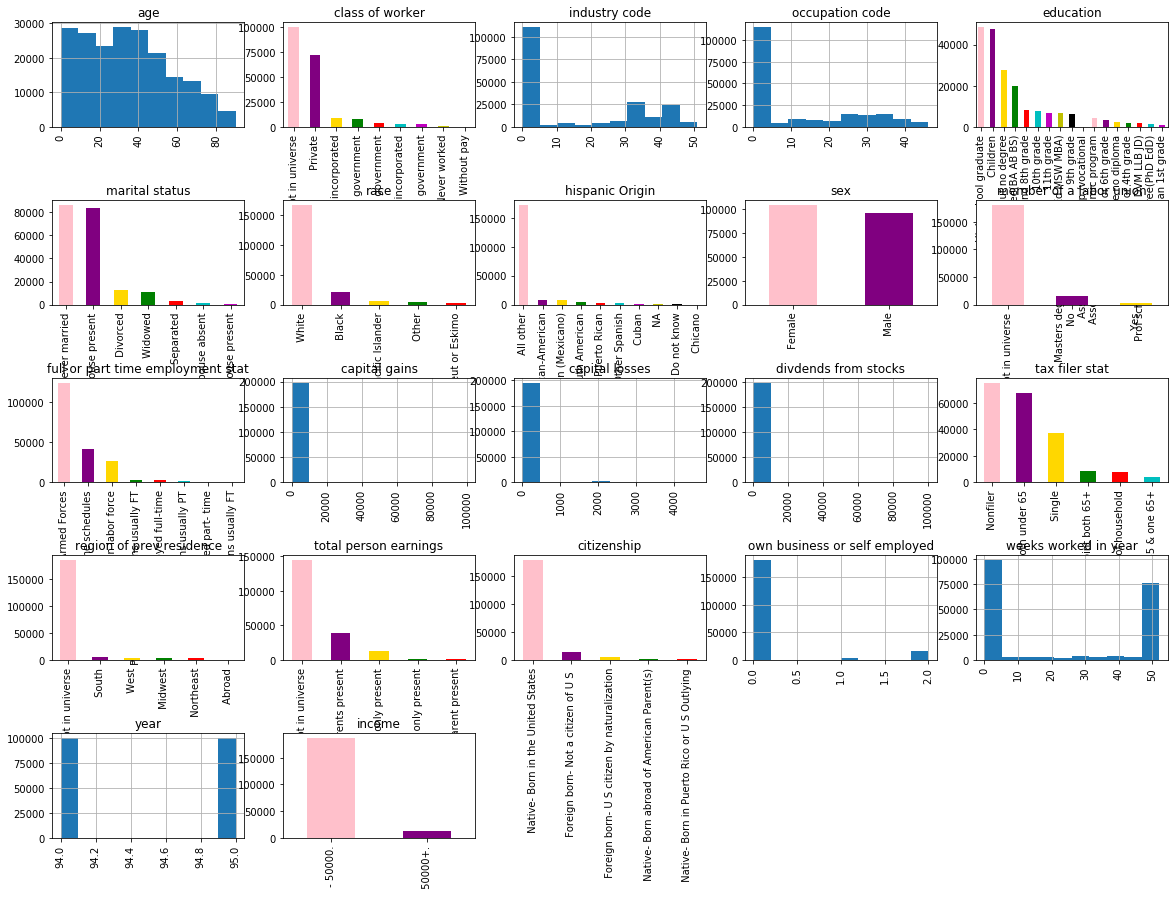

In [54]:
from matplotlib import pyplot as plt
import math
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(xtrain.shape[1]) / cols) # rows of subplots
print('Number of rows for Subplots are : ',rows)
for i, column in enumerate(xtrain.columns):
    print(i,'  ', column)
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if xtrain.dtypes[column] == np.object:
        xtrain[column].value_counts().plot(kind="bar", axes=ax, color = ['pink','purple','gold','g','r','c','m','y','k','w'])    
    else:
        xtrain[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
hspace = 1.0   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
wspace = 1.0  # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width

In [55]:
xtrain['race'].value_counts()/xtrain.shape[0]

 White                          0.838826
 Black                          0.102319
 Asian or Pacific Islander      0.029245
 Other                          0.018329
 Amer Indian Aleut or Eskimo    0.011282
Name: race, dtype: float64

In [56]:
xtrain['income'].value_counts()/xtrain.shape[0]

 - 50000.    0.937942
 50000+.     0.062058
Name: income, dtype: float64

In [57]:
xtrain['industry code'].value_counts()/xtrain.shape[0]

0     0.504624
33    0.085554
43    0.041514
4     0.029992
42    0.023471
45    0.022464
29    0.021095
37    0.020158
41    0.019867
32    0.018023
35    0.016940
39    0.014720
34    0.013858
44    0.012775
2     0.011006
11    0.008841
50    0.008540
40    0.008275
47    0.008240
38    0.008164
24    0.007533
12    0.006766
19    0.006746
30    0.005919
31    0.005904
25    0.005433
9     0.004977
22    0.004771
36    0.004736
13    0.004506
1     0.004145
48    0.003268
27    0.003137
49    0.003057
3     0.002822
21    0.002802
6     0.002777
5     0.002772
8     0.002757
16    0.002701
23    0.002631
18    0.002421
15    0.002265
7     0.002115
14    0.001479
46    0.000937
17    0.000787
28    0.000717
26    0.000637
51    0.000180
20    0.000160
10    0.000020
Name: industry code, dtype: float64

In [58]:
train.groupby('sex')['age'].mean()

sex
 Female    35.618230
 Male      33.270811
Name: age, dtype: float64

In [59]:
df4 = xtrain.groupby(['sex','race'])['age'].mean()
df4

sex      race                        
 Female   Amer Indian Aleut or Eskimo    28.743073
          Asian or Pacific Islander      32.078571
          Black                          32.136918
          Other                          24.549708
          White                          36.534371
 Male     Amer Indian Aleut or Eskimo    26.498113
          Asian or Pacific Islander      29.957895
          Black                          28.573938
          Other                          23.871622
          White                          34.208266
Name: age, dtype: float64

In [60]:
cross_tab = pd.crosstab(xtrain['sex'],xtrain['income'])
print(cross_tab)

income    - 50000.   50000+.
sex                         
 Female     101321      2663
 Male        85820      9719


In [61]:
df = xtrain.groupby(['income','sex'])['age'].mean()
print(df)

income     sex    
 - 50000.   Female    35.346453
            Male      31.789560
 50000+.    Female    45.958693
            Male      46.350448
Name: age, dtype: float64


In [62]:
edu = pd.crosstab(xtrain['education'],xtrain['income'])
print(edu)

income                                    - 50000.   50000+.
education                                                   
 10th grade                                   7495        62
 11th grade                                   6806        70
 12th grade no diploma                        2092        34
 1st 2nd 3rd or 4th grade                     1786        13
 5th or 6th grade                             3255        22
 7th and 8th grade                            7935        72
 9th grade                                    6192        38
 Associates degree-academic program           3951       412
 Associates degree-occup /vocational          4945       413
 Bachelors degree(BA AB BS)                  15950      3915
 Children                                    47422         0
 Doctorate degree(PhD EdD)                     606       657
 High school graduate                        46528      1879
 Less than 1st grade                           818         1
 Masters degree(MA MS ME

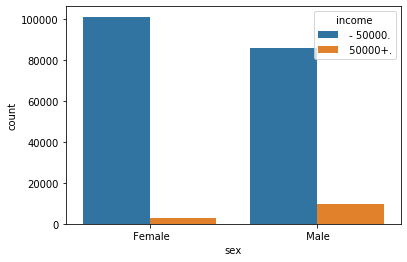

In [63]:
sns.countplot(xtrain['sex'],hue=xtrain['income'])
plt.show()

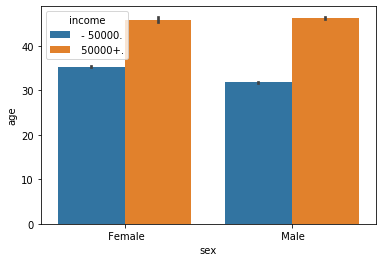

In [64]:
sns.barplot(xtrain['sex'],xtrain['age'],hue = xtrain['income'])
plt.show()

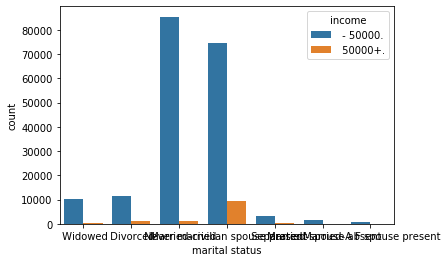

In [65]:
sns.countplot(xtrain['marital status'],hue=xtrain['income'])
plt.show()

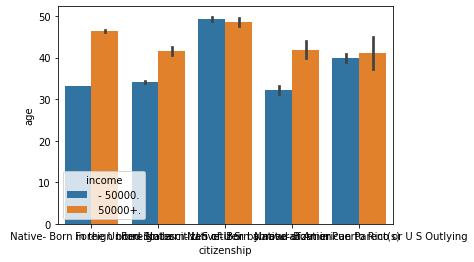

In [66]:
sns.barplot(xtrain['citizenship'],xtrain['age'],hue = xtrain['income'])
plt.show()

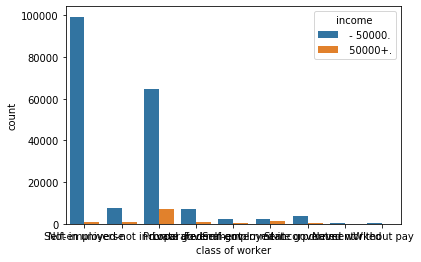

In [67]:
sns.countplot(xtrain['class of worker'],hue=xtrain['income'])
plt.show()

In [68]:
x = ['class of worker','education','member of a labor union','full or part time employment stat','total person earnings']
#ordinal data

In [69]:
xtrain

,age,class of worker,industry code,occupation code,education,marital status,race,hispanic Origin,sex,member of a labor union,...,capital losses,divdends from stocks,tax filer stat,region of prev residence,total person earnings,citizenship,own business or self employed,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,Widowed,White,All other,Female,Not in universe,...,0,0,Nonfiler,Not in universe,Not in universe,Native- Born in the United States,0,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,Divorced,White,All other,Male,Not in universe,...,0,0,Head of household,South,Not in universe,Native- Born in the United States,0,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,Never married,Asian or Pacific Islander,All other,Female,Not in universe,...,0,0,Nonfiler,Not in universe,Not in universe,Foreign born- Not a citizen of U S,0,0,95,- 50000.
3,9,Not in universe,0,0,Children,Never married,White,All other,Female,Not in universe,...,0,0,Nonfiler,Not in universe,Both parents present,Native- Born in the United States,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,Never married,White,All other,Female,Not in universe,...,0,0,Nonfiler,Not in universe,Both parents present,Native- Born in the United States,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,No,...,0,0,Joint both under 65,Not in universe,Not in universe,Native- Born in the United States,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Male,Not in universe,...,0,0,Joint both under 65,Not in universe,Not in universe,Native- Born in the United States,0,52,94,- 50000.
7,28,Private,4,40,High school graduate,Never married,White,All other,Female,Not in universe,...,0,0,Single,Not in universe,Not in universe,Native- Born in the United States,0,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,Married-civilian spouse present,White,All other,Female,No,...,0,0,Joint both under 65,Not in universe,Not in universe,Native- Born in the United States,0,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,Married-civilian spouse present,White,All other,Male,Not in universe,...,0,0,Joint both under 65,Not in universe,Not in universe,Native- Born in the United States,0,52,94,- 50000.


In [70]:
print(categorical_var)

Index(['class of worker', 'education', 'marital status', 'race',
       'hispanic Origin', 'sex', 'member of a labor union',
       'full or part time employment stat', 'tax filer stat',
       'region of prev residence', 'total person earnings', 'citizenship',
       'income'],
      dtype='object')


In [71]:
xtrain = xtrain.drop(columns = 'income')

In [72]:
#one hot encoding
x_train=pd.get_dummies(xtrain,drop_first = True)

In [73]:
x_test=pd.get_dummies(xtest,drop_first = True)

In [74]:
x_train.head()

,age,industry code,occupation code,capital gains,capital losses,divdends from stocks,own business or self employed,weeks worked in year,year,class of worker_ Local government,...,region of prev residence_ South,region of prev residence_ West,total person earnings_ Father only present,total person earnings_ Mother only present,total person earnings_ Neither parent present,total person earnings_ Not in universe,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States
0,73,0,0,0,0,0,0,0,95,0,...,0,0,0,0,0,1,0,0,0,1
1,58,4,34,0,0,0,0,52,94,0,...,1,0,0,0,0,1,0,0,0,1
2,18,0,0,0,0,0,0,0,95,0,...,0,0,0,0,0,1,0,0,0,0
3,9,0,0,0,0,0,0,0,94,0,...,0,0,0,0,0,0,0,0,0,1
4,10,0,0,0,0,0,0,0,94,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
x_test.head()

,age,industry code,occupation code,capital gains,capital losses,divdends from stocks,own business or self employed,weeks worked in year,year,class of worker_ Local government,...,region of prev residence_ South,region of prev residence_ West,total person earnings_ Father only present,total person earnings_ Mother only present,total person earnings_ Neither parent present,total person earnings_ Not in universe,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States
0,38,6,36,0,0,0,0,12,95,0,...,0,0,0,0,0,1,0,0,0,0
1,44,37,12,0,0,2500,0,26,95,0,...,0,0,0,0,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,95,0,...,0,0,0,0,0,0,0,0,0,1
3,35,29,3,0,0,0,2,52,94,0,...,0,0,0,0,0,1,0,0,0,1
4,49,4,34,0,0,0,0,50,95,0,...,0,0,0,0,0,1,0,0,0,1


In [76]:
ytrain.head()

0     - 50000.
1     - 50000.
2     - 50000.
3     - 50000.
4     - 50000.
Name: income, dtype: object

In [77]:
ytest.head()

0     - 50000.
1     - 50000.
2     - 50000.
3     - 50000.
4     - 50000.
Name: income, dtype: object

## Decision Tree

#### Decision Tree - Gini Index

In [78]:
# Gini Index
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_gini = DecisionTreeClassifier(random_state = 100,
                               max_depth=3, min_samples_leaf=5)

In [88]:
clf_gini1 = DecisionTreeClassifier(random_state = 100,
                               max_depth=2, min_samples_leaf=10)

In [89]:
clf_gini1 = clf_gini1.fit(x_train,ytrain)

In [90]:
y_pred1 = clf.predict(x_test)
y_pred1

array([' - 50000.', ' - 50000.', ' - 50000.', ..., ' - 50000.',
       ' - 50000.', ' - 50000.'], dtype=object)

In [91]:
# Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred1))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred1))
print('\n')


print("=== Accuracy ===")
print(accuracy_score(ytest, y_pred1)*100)
print('\n')

=== Confusion Matrix ===
[[93275   301]
 [ 5217   969]]


=== Classification Report ===
              precision    recall  f1-score   support

    - 50000.       0.95      1.00      0.97     93576
     50000+.       0.76      0.16      0.26      6186

    accuracy                           0.94     99762
   macro avg       0.86      0.58      0.62     99762
weighted avg       0.94      0.94      0.93     99762



=== Accuracy ===
94.46883582927367




In [79]:
# Train Decision Tree Classifer
clf = clf_gini.fit(x_train,ytrain)

In [80]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([' - 50000.', ' - 50000.', ' - 50000.', ..., ' - 50000.',
       ' - 50000.', ' - 50000.'], dtype=object)

In [81]:
# Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(accuracy_score(ytest, y_pred)*100)
print('\n')

=== Confusion Matrix ===
[[93275   301]
 [ 5217   969]]


=== Classification Report ===
              precision    recall  f1-score   support

    - 50000.       0.95      1.00      0.97     93576
     50000+.       0.76      0.16      0.26      6186

    accuracy                           0.94     99762
   macro avg       0.86      0.58      0.62     99762
weighted avg       0.94      0.94      0.93     99762



=== Accuracy ===
94.46883582927367




[Text(418.5, 713.475, 'X[3] <= 7364.0\nentropy = 0.116\nsamples = 199523\nvalue = [187141, 12382]'),
 Text(209.25, 509.625, 'X[7] <= 47.5\nentropy = 0.1\nsamples = 196788\nvalue = [186386, 10402]'),
 Text(104.625, 305.775, 'X[5] <= 12689.5\nentropy = 0.019\nsamples = 123316\nvalue = [122109, 1207]'),
 Text(52.3125, 101.92499999999995, 'entropy = 0.017\nsamples = 123051\nvalue = [121970, 1081]'),
 Text(156.9375, 101.92499999999995, 'entropy = 0.499\nsamples = 265\nvalue = [139, 126]'),
 Text(313.875, 305.775, 'X[2] <= 18.5\nentropy = 0.219\nsamples = 73472\nvalue = [64277, 9195]'),
 Text(261.5625, 101.92499999999995, 'entropy = 0.359\nsamples = 30018\nvalue = [22968, 7050]'),
 Text(366.1875, 101.92499999999995, 'entropy = 0.094\nsamples = 43454\nvalue = [41309, 2145]'),
 Text(627.75, 509.625, 'X[3] <= 10041.0\nentropy = 0.4\nsamples = 2735\nvalue = [755, 1980]'),
 Text(523.125, 305.775, 'X[66] <= 0.5\nentropy = 0.496\nsamples = 889\nvalue = [482, 407]'),
 Text(470.8125, 101.924999999999

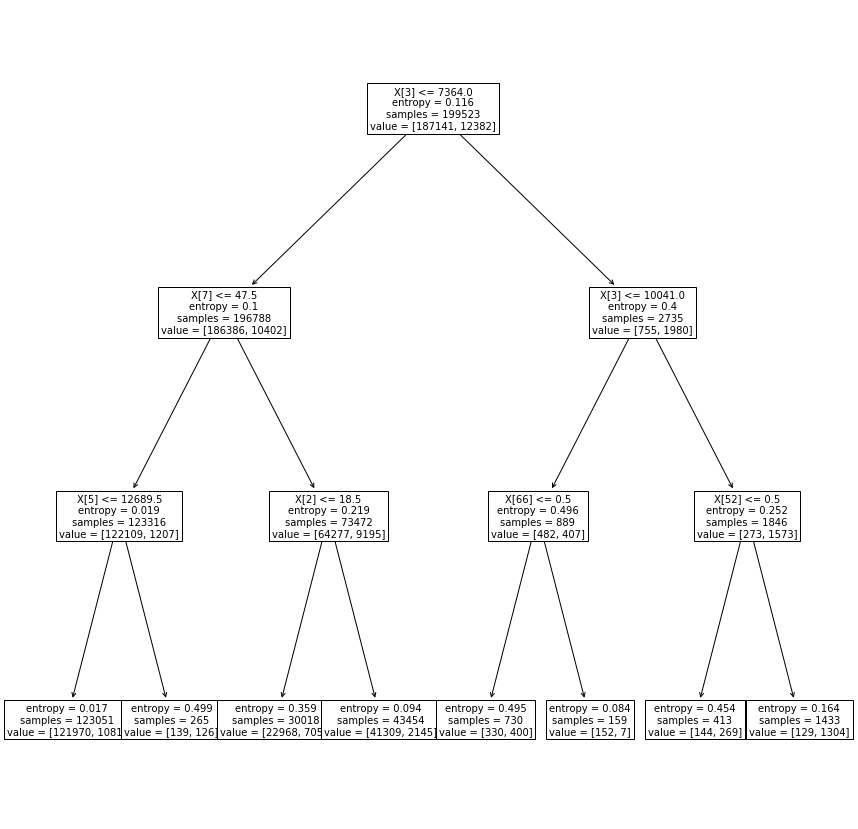

In [170]:
### Check - figure is showing entroy

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,15
plot_tree(clf_gini.fit(x_train,ytrain), fontsize = 10) 

In [171]:
# Gini Index - different parameters
 # Adding splitter, increasing max depth
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, splitter = "random",
                               max_depth=10, min_samples_leaf=5)

In [172]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,ytrain)

In [173]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([' - 50000.', ' - 50000.', ' - 50000.', ..., ' - 50000.',
       ' - 50000.', ' - 50000.'], dtype=object)

In [174]:
# Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(accuracy_score(ytest, y_pred)*100)
print('\n')

=== Confusion Matrix ===
[[92034  1542]
 [ 3732  2454]]


=== Classification Report ===
              precision    recall  f1-score   support

    - 50000.       0.96      0.98      0.97     93576
     50000+.       0.61      0.40      0.48      6186

    accuracy                           0.95     99762
   macro avg       0.79      0.69      0.73     99762
weighted avg       0.94      0.95      0.94     99762



=== Accuracy ===
94.71341793468456




In [175]:
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 25,15
#tree.plot_tree(clf.fit(x_train,ytrain), fontsize = 10)

#### Decision Tree - Entropy

In [176]:
# Entropy
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

In [177]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,ytrain)

In [178]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([' - 50000.', ' - 50000.', ' - 50000.', ..., ' - 50000.',
       ' - 50000.', ' - 50000.'], dtype=object)

In [179]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(ytest, y_pred)*100)

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(accuracy_score(ytest, y_pred)*100)
print('\n')

Accuracy: 93.7992421964275
=== Confusion Matrix ===
[[93576     0]
 [ 6186     0]]


=== Classification Report ===


c:\users\dell 2\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    - 50000.       0.94      1.00      0.97     93576
     50000+.       0.00      0.00      0.00      6186

    accuracy                           0.94     99762
   macro avg       0.47      0.50      0.48     99762
weighted avg       0.88      0.94      0.91     99762



=== Accuracy ===
93.7992421964275




[Text(697.5, 713.475, 'X[7] <= 44.5\nentropy = 0.336\nsamples = 199523\nvalue = [187141, 12382]'),
 Text(348.75, 509.625, 'X[65] <= 0.5\nentropy = 0.086\nsamples = 122116\nvalue = [120802, 1314]'),
 Text(174.375, 305.775, 'X[3] <= 5826.5\nentropy = 0.179\nsamples = 47532\nvalue = [46252, 1280]'),
 Text(87.1875, 101.92499999999995, 'entropy = 0.154\nsamples = 46948\nvalue = [45906, 1042]'),
 Text(261.5625, 101.92499999999995, 'entropy = 0.975\nsamples = 584\nvalue = [346, 238]'),
 Text(523.125, 305.775, 'X[0] <= 20.5\nentropy = 0.006\nsamples = 74584\nvalue = [74550, 34]'),
 Text(435.9375, 101.92499999999995, 'entropy = 0.0\nsamples = 56615\nvalue = [56615, 0]'),
 Text(610.3125, 101.92499999999995, 'entropy = 0.02\nsamples = 17969\nvalue = [17935, 34]'),
 Text(1046.25, 509.625, 'X[2] <= 18.5\nentropy = 0.592\nsamples = 77407\nvalue = [66339, 11068]'),
 Text(871.875, 305.775, 'X[52] <= 0.5\nentropy = 0.836\nsamples = 32383\nvalue = [23769, 8614]'),
 Text(784.6875, 101.92499999999995, 'en

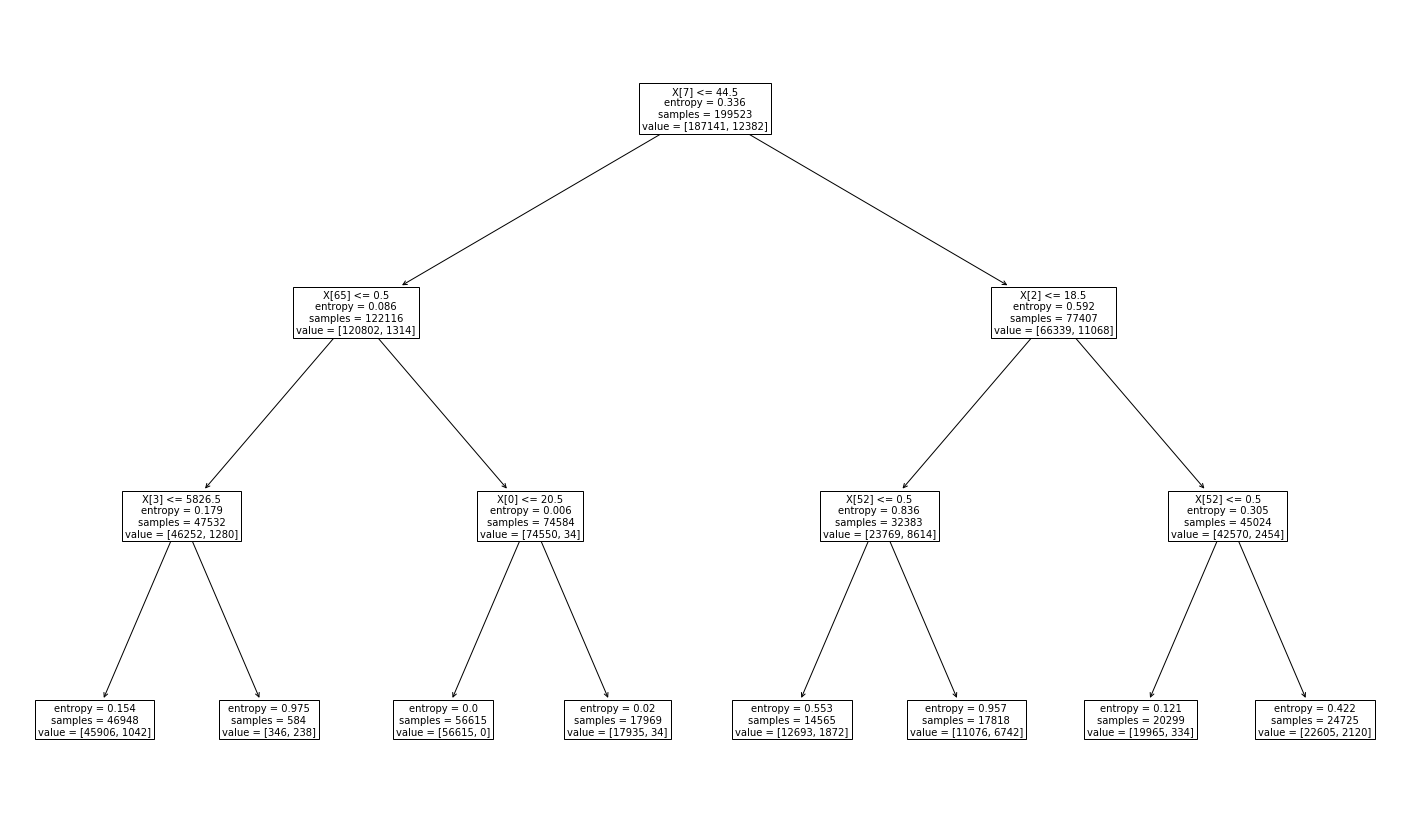

In [180]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,15
tree.plot_tree(clf.fit(x_train,ytrain), fontsize = 10)

In [183]:
# Entropy - different parameters
 # Max leaf nodes =10, max depth =1
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_leaf_nodes = 5,
                               max_depth=2, min_samples_leaf=5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([' - 50000.', ' - 50000.', ' - 50000.', ..., ' - 50000.',
       ' - 50000.', ' - 50000.'], dtype=object)

In [184]:
from sklearn import metrics

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(accuracy_score(ytest, y_pred)*100)
print('\n')

=== Confusion Matrix ===
[[93576     0]
 [ 6186     0]]


=== Classification Report ===


c:\users\dell 2\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    - 50000.       0.94      1.00      0.97     93576
     50000+.       0.00      0.00      0.00      6186

    accuracy                           0.94     99762
   macro avg       0.47      0.50      0.48     99762
weighted avg       0.88      0.94      0.91     99762



=== Accuracy ===
93.7992421964275




[Text(697.5, 906.0, 'X[7] <= 44.5\nentropy = 0.336\nsamples = 199523\nvalue = [187141, 12382]'),
 Text(348.75, 543.6, 'X[65] <= 0.5\nentropy = 0.086\nsamples = 122116\nvalue = [120802, 1314]'),
 Text(174.375, 181.19999999999993, 'entropy = 0.179\nsamples = 47532\nvalue = [46252, 1280]'),
 Text(523.125, 181.19999999999993, 'entropy = 0.006\nsamples = 74584\nvalue = [74550, 34]'),
 Text(1046.25, 543.6, 'X[2] <= 18.5\nentropy = 0.592\nsamples = 77407\nvalue = [66339, 11068]'),
 Text(871.875, 181.19999999999993, 'entropy = 0.836\nsamples = 32383\nvalue = [23769, 8614]'),
 Text(1220.625, 181.19999999999993, 'entropy = 0.305\nsamples = 45024\nvalue = [42570, 2454]')]

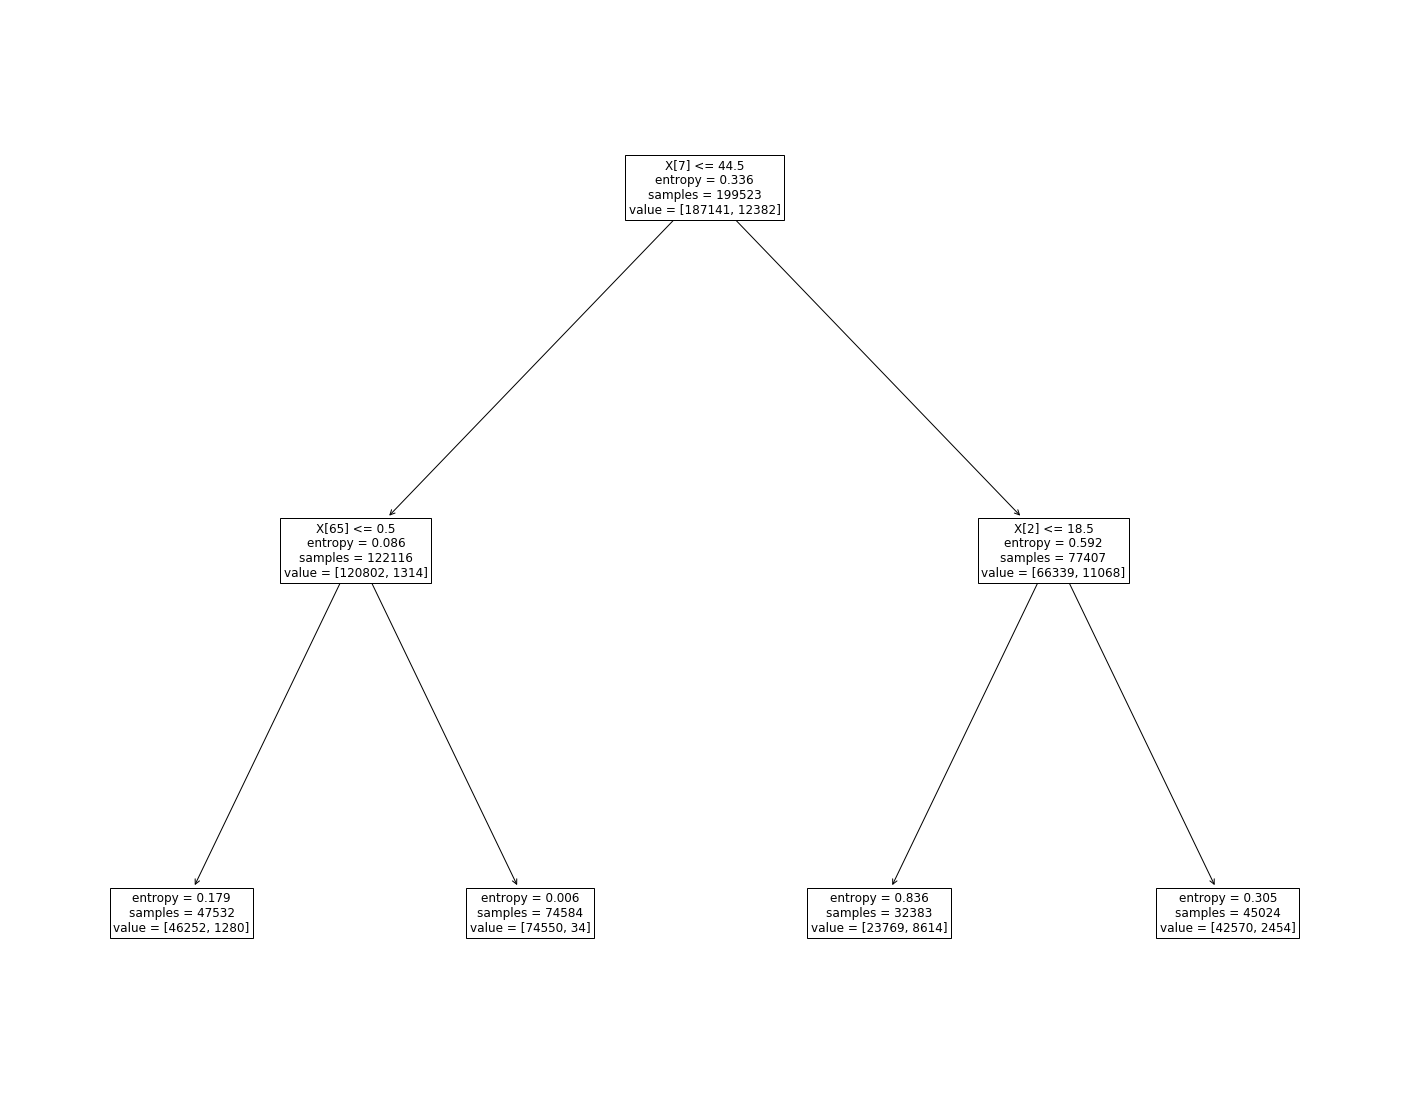

In [199]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,20
tree.plot_tree(clf.fit(x_train,ytrain), fontsize = 12)

## Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(x_train, ytrain)
y_pred = model.predict(x_test)

In [187]:
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(model, x_train, ytrain, cv=10, scoring='roc_auc')

In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(metrics.accuracy_score(ytest, y_pred)*100)
print('\n')

print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')


print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[92437  1139]
 [ 3631  2555]]


=== Classification Report ===
              precision    recall  f1-score   support

    - 50000.       0.96      0.99      0.97     93576
     50000+.       0.69      0.41      0.52      6186

    accuracy                           0.95     99762
   macro avg       0.83      0.70      0.75     99762
weighted avg       0.95      0.95      0.95     99762



=== Accuracy ===
95.21862031635293


=== All AUC Scores ===
[0.91608385 0.90566807 0.90982559 0.91281224 0.91558004 0.91138734
 0.90279171 0.90210125 0.9136763  0.90013951]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9090065924165943


### Visualization

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [190]:
features = x_train.columns

In [191]:
importances = model.feature_importances_
indices = np.argsort(importances)

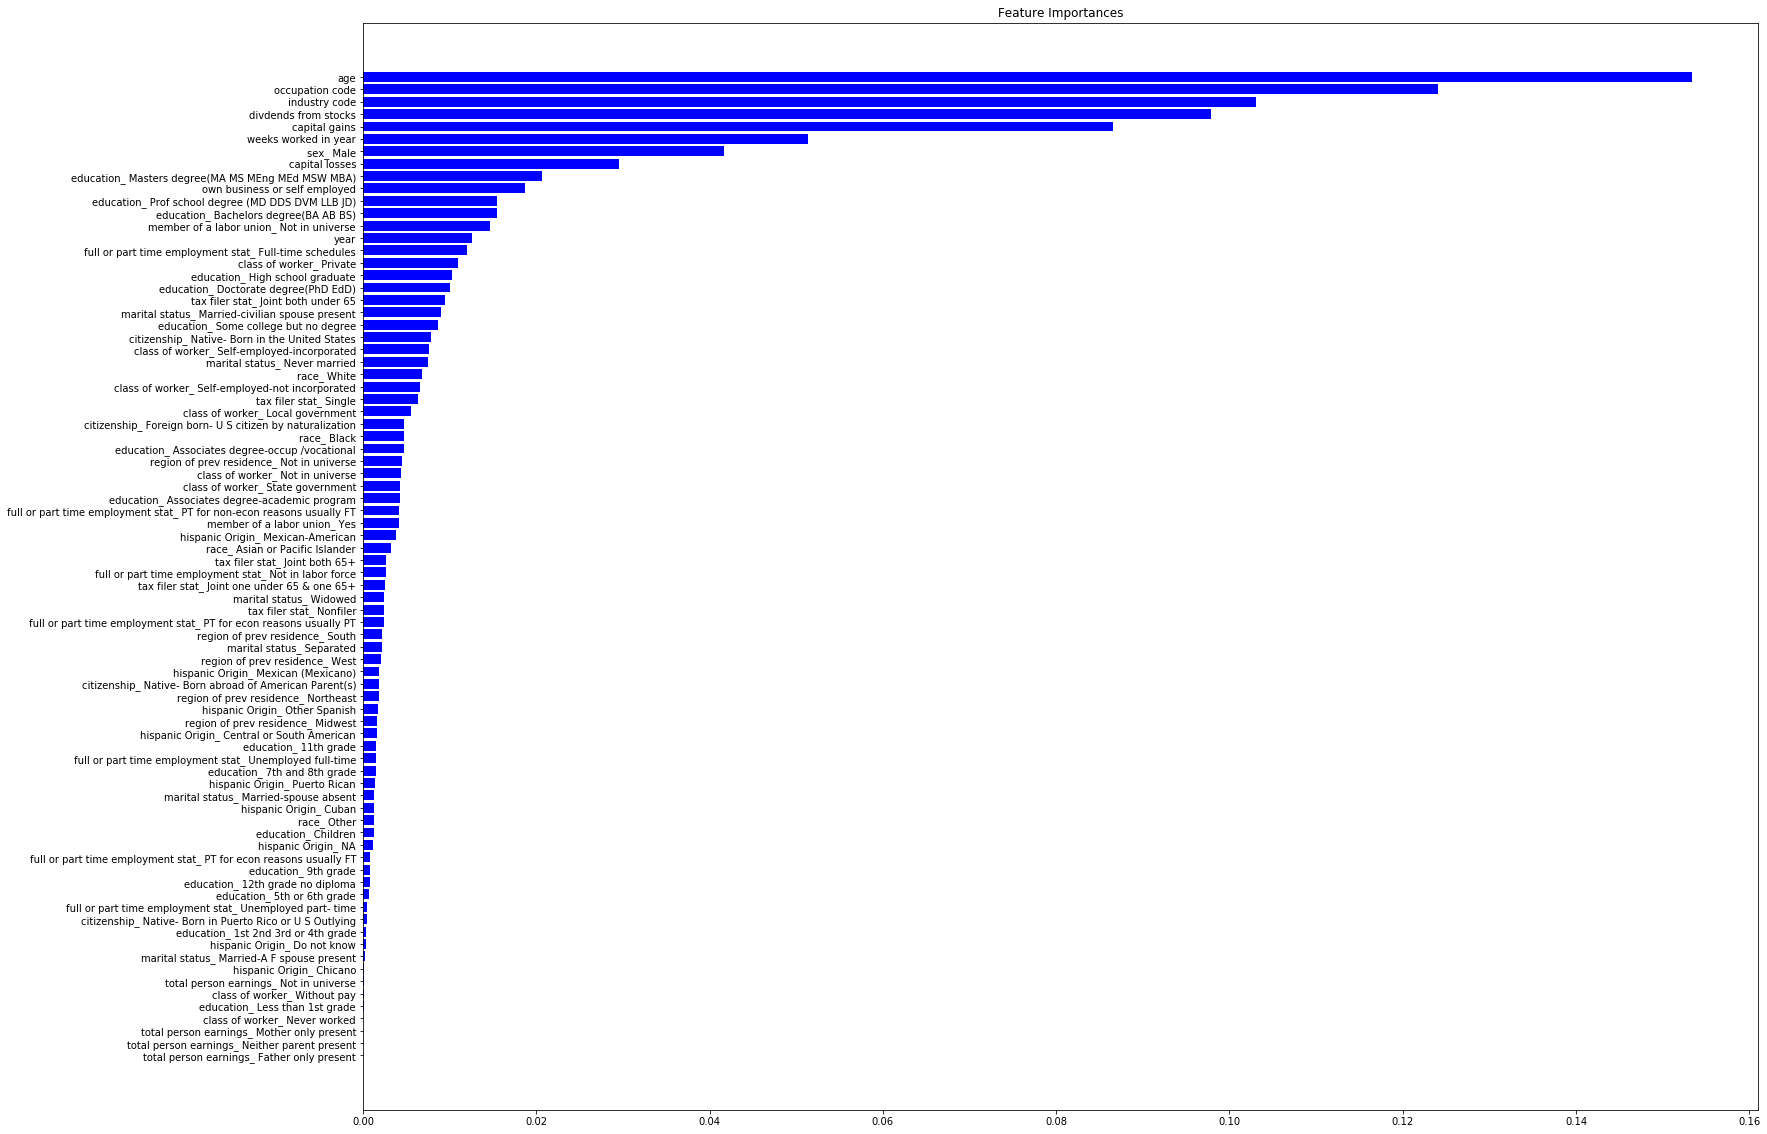

In [200]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b',  align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

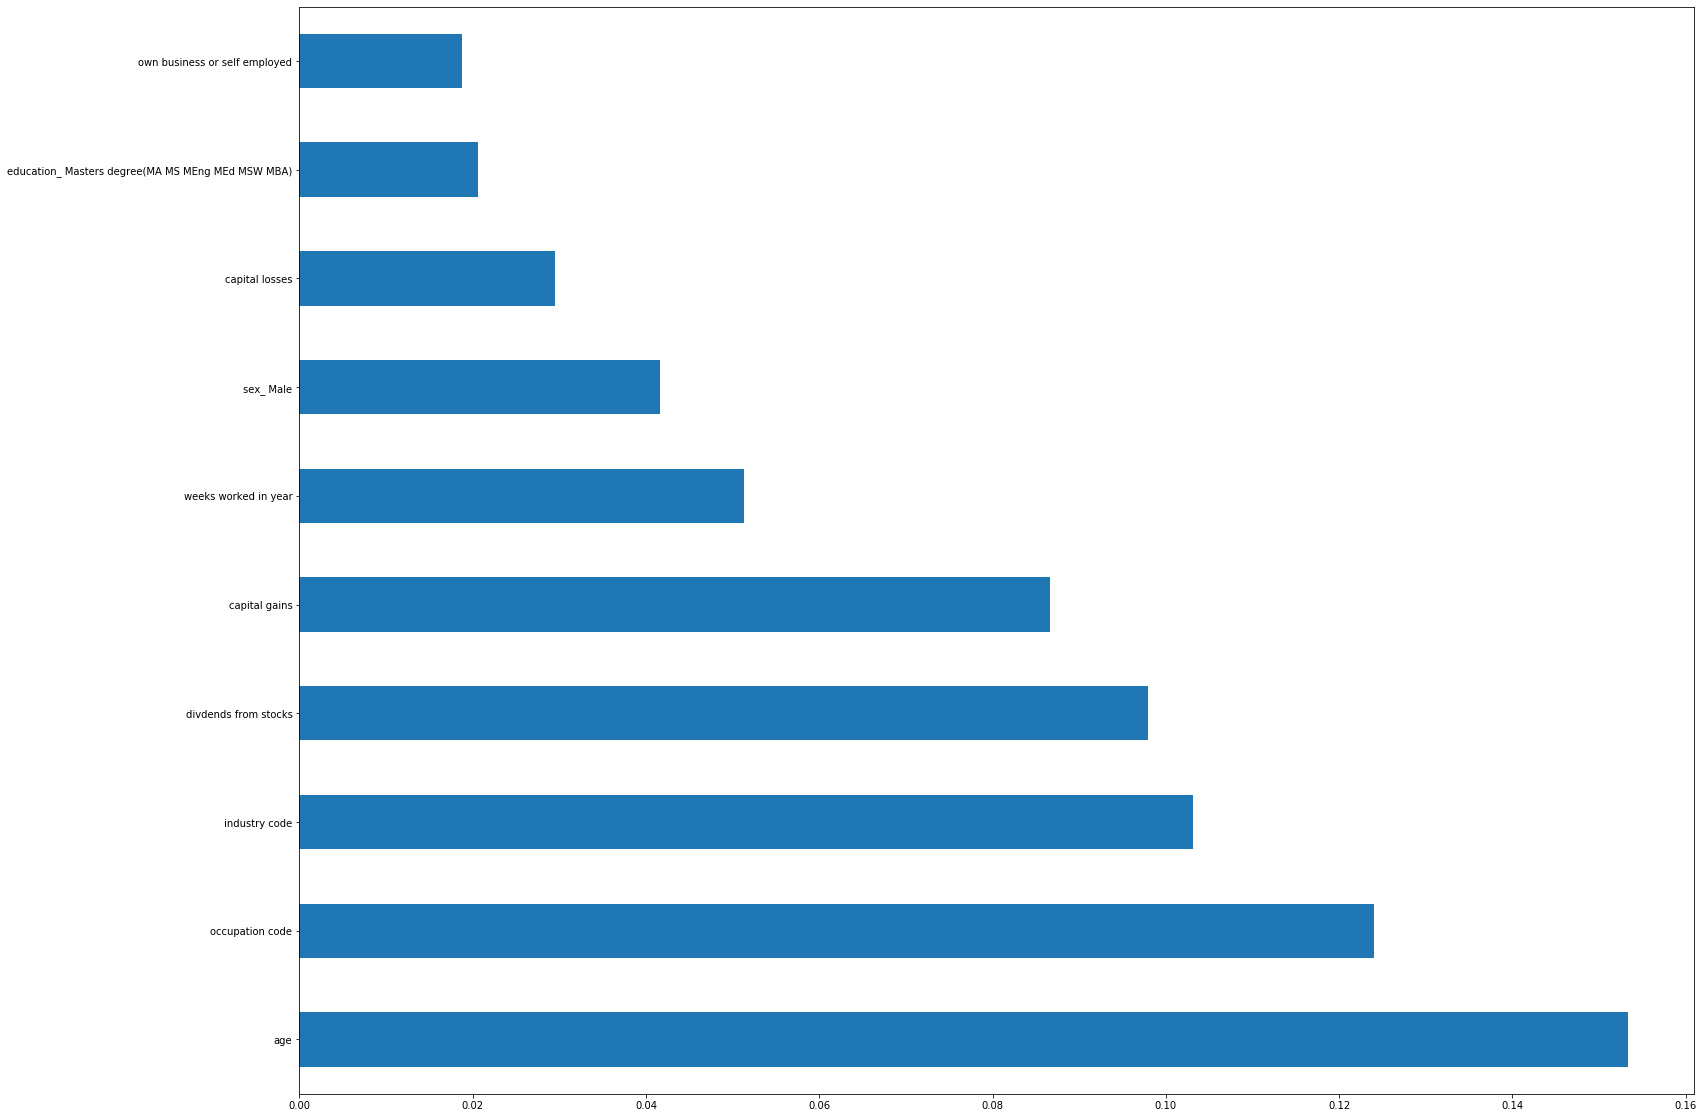

In [201]:
# Top 10 important features

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Principal Component Analysis

In [312]:
xtrain = xtrain.drop(columns = 'income')

In [318]:
type(xtrain)

pandas.core.frame.DataFrame

In [322]:
x =xtrain.select_dtypes(include = ['int64','float64'])
x.head()

,age,industry code,occupation code,capital gains,capital losses,divdends from stocks,own business or self employed,weeks worked in year,year
0,73,0,0,0,0,0,0,0,95
1,58,4,34,0,0,0,0,52,94
2,18,0,0,0,0,0,0,0,95
3,9,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,94


In [330]:
test_x =xtest.select_dtypes(include = ['int64','float64'])
test_x.head()

,age,industry code,occupation code,capital gains,capital losses,divdends from stocks,own business or self employed,weeks worked in year,year
0,38,6,36,0,0,0,0,12,95
1,44,37,12,0,0,2500,0,26,95
2,2,0,0,0,0,0,0,0,95
3,35,29,3,0,0,0,2,52,94
4,49,4,34,0,0,0,0,50,95


In [331]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain1 = sc.fit_transform(x)
xtest1 = sc.fit_transform(test_x)

In [332]:
np.mean(xtrain1),np.std(xtrain1)

(1.4600434950685835e-15, 1.0000000000000002)

In [326]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(xtrain1)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3', 'PC 4', 'PC 5','PC 6'])

In [327]:
principalDF.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,-1.192245,0.857382,-0.420778,-1.059790,-1.162216,0.269170
1,1.210264,0.151024,-0.491631,0.995224,-1.023449,-0.044872
2,-1.638563,-0.234144,0.326782,-0.979713,0.268781,-0.068237
3,-1.720129,-0.463493,0.115936,1.001424,0.592781,-0.104861
4,-1.712014,-0.443647,0.102344,0.999968,0.566763,-0.098726


In [328]:
# Explained Variance
# How much variance can be attributed to each of the principal component

pca.explained_variance_ratio_

# The first PC has 21.5% of variance in the dataset. 

array([0.27951484, 0.13256377, 0.11314392, 0.11108115, 0.10449379,
       0.09578498])

In [329]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27951484 0.13256377 0.11314392 0.11108115 0.10449379 0.09578498]


### Applying PCA - Random Forest

In [333]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 20, random_state=0)
classifier.fit(xtrain1, ytrain)

# Predicting the Test set results
y_pred = classifier.predict(xtest1)

In [337]:
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(classifier, x_train, ytrain, cv=10, scoring='roc_auc')

In [338]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Confusion Matrix ===")
print(confusion_matrix(ytest, y_pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(ytest,y_pred))
print('\n')


print("=== Accuracy ===")
print(metrics.accuracy_score(ytest, y_pred)*100)
print('\n')

print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')


print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[91949  1627]
 [ 3886  2300]]


=== Classification Report ===
              precision    recall  f1-score   support

    - 50000.       0.96      0.98      0.97     93576
     50000+.       0.59      0.37      0.45      6186

    accuracy                           0.94     99762
   macro avg       0.77      0.68      0.71     99762
weighted avg       0.94      0.94      0.94     99762



=== Accuracy ===
94.47384775766324


=== All AUC Scores ===
[0.91562536 0.90448345 0.91010503 0.91268994 0.91559497 0.91088767
 0.90271516 0.90217549 0.91373807 0.90007205]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9088087189828042
